# Understanding Kernels in Machine Learning

# Not yet completed

The kernel corresponds to a dot product in a (usually
high-dimensional) feature space [1]. In this space, our estimation methods are linear, but as long as we can formulate everything in terms of kernel evaluations, we never explicitly have to compute in the high-dimensional feature
space [1].

## Prerequisites


Suppose we are given emperical data 
$$ (x_1,y_1), \dots,(x_n,y_n) \in \mathcal{X} \times \mathcal{Y}$$.

Here, $x_i \in \mathcal{X} $ is called  a input/predictor variable while and $y_i \in \mathcal{Y}$ is called target/response variable.

In learning, we want to be able to $\textit{generalize}$ to unseen datapoints. In the case of binary classification, given some unseen input $x\in\mathcal{X}$, we would like to predict the correcsponding target $y \in \{ \pm 1 \}$. Loosely speaking, we would like to chose $y$ such that $(x,y)$ is some sense similar to the training examples. 

To this end, we need similarity measures in $\mathcal{X}$ and in $\{ \pm 1 \}$. For the former, we require a function 

$$ k: \mathcal{X} \times \mathcal{X} \rightarrow \mathbb{R}$$

satisfying for all $ x,x^{'} \in \mathcal{X}$,

$$ k(x,x^{'}) = < \Phi(x), \Phi(x^{'}) >$$, where $\Phi$ maps into some dot product space $\mathcal{H}$, that is also called the $\textit{feature space}$. $k$ and $\Phi$ are called a kernel and its feature map.

### Definition

#### 1. Gram matrix
Given a kernel $k$ and inputs $x_1 , \dots , x_n \in \mathcal{X}$, the  $ n \times n $ matrix is called the Gram matrix

$$ K:= ( k (x_i,x_j))_{ij} $$



#### 2. Positive Definite Matrix.
A real $ n \times n $ symmetric matrix $K_{ij}$ satisfiying

$$ \Sigma_{i,j} c_i c_j K_{ij} \geq 0$$ for all $c_i \in \mathbb{R}$ is called positive definite.


and many other in [1].

In [3]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [4]:
## Define a true function 
def f(x):
    return np.sin(x/10)+(x/50)**2

In [5]:
N = 100    # number of training points.
n = 30     # number of testing points.
s = 0.3    # noise variance.

In [6]:
X = np.arange(N).reshape(N,1)
y = f(X)+s*np.random.randn(N,1)

In [7]:
Xtest = np.linspace(0, N, 30).reshape(-1,1)
ytest=f(Xtest)+s*np.random.randn(30,1)

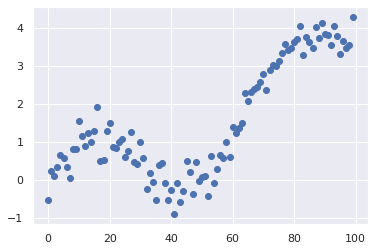

In [8]:
plt.scatter(X,y)

# Computing Coeffiecients

To compute coefficents we use gaussian function seen below. Gaussian function/kernel has desired properties/characteristics for finding coefficients of such problem. If we assume that the input of a gaussian function is the difference between true value and a prediction, then Gaussian function yields highest result **1** when such difference equals to **0**. 


In other words, as the discrepancy between prediction and true value diminishes, gaussian function approaches its global maximum/ maximum value.



# Brief Excursion of Gaussians

## The Gaussian distribution

$$ \mathcal{N}(x|\mu,\,\sigma^{2}) =\frac{1}{\sqrt{2 \pi \sigma^2}} \mathbf{e}^{-\frac{1}{2\sigma^2}(x-\mu)^2}$$ where  
+ $\mu$ is expected value/mean
+ $\sigma$ is standard devation of mean
+ $\sigma^2$ is the variance.
+ The recoprocal of the variance as $\beta=\frac{1}{\sigma^2}$ is called the precision.

From the from above, we see that the Gaussian distribution satisfies

$$ \mathcal{N}(x|\mu,\sigma^2) > 0$$ which is also shown below

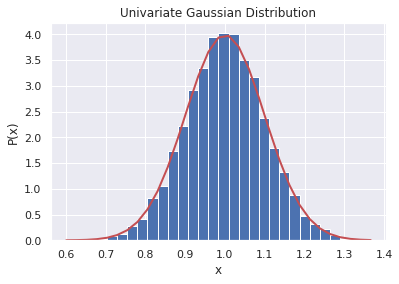

In [9]:
mu, sigma, N = 1, 0.1,10000 # mean and standard deviation
x = np.random.normal(mu, sigma, N)

np.all(x>0)## all simulated variables from given Gaussian greater than o.


gaussian=lambda x,mu,sigma: 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * sigma**2) ) 
count, bins, ignored = plt.hist(x, 30, density=True)

plt.plot(bins,gaussian(bins,mu,sigma),linewidth=2, color='r')

plt.title('Univariate Gaussian Distribution')
plt.ylabel('P(x)')
plt.xlabel('x')
plt.show()

In [10]:
def gaussian_function(x):
    """
    1/(sigma*np.sqrt(2*np.pi)) is threated as constant
    as it is same for all x values
    first term is threated as constant as it is same for all x values
    """
    sigma=1
    mu=0
    second_term=np.exp(-0.5 * ( 1/np.power(sigma,2) ) * ( np.power(x-mu,2)))
    return second_term
#input_=np.linspace(-6, 6,1000)
#plt.plot(input_,gaussian_function(input_))    

In [352]:
predictions=[]
for point in Xtest:
    weights=[]
    for index in range(len(X)):
        w=gaussian_function(point-X[index])
        weights.append(w)

    weights=np.array(weights).reshape(1,len(weights))

    p=weights@y/weights.sum()
    predictions.append(p[0])
    

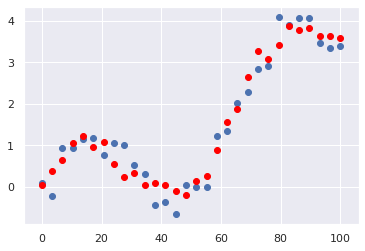

In [353]:
plt.scatter(Xtest,ytest)
plt.scatter(Xtest,predictions,color='red')

# Faster implementation

In [325]:
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 1
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

In [354]:
gram_matrix=kernel(Xtest,X)

In [355]:
gram_matrix

array([[1.00000000e+00, 6.06530660e-01, 1.35335283e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.61810839e-03, 4.99352882e-02, 3.50374924e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.69840543e-11, 2.81797806e-08, 6.21770685e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.04694294e-04, 6.21770685e-06, 2.81797806e-08],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.04407158e-01, 3.50374924e-01, 4.99352882e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.11089965e-02, 1.35335283e-01, 6.06530660e-01]])

In [356]:
predictions=[]
for index in range(len(Xtest)):
    p=gram_matrix[index]@y/gram_matrix[index].sum()
    predictions.append(p)

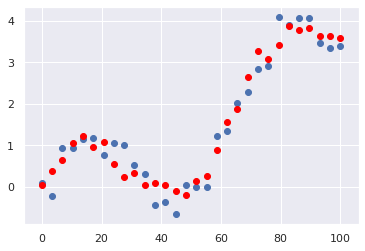

In [357]:
plt.scatter(Xtest,ytest)
plt.scatter(Xtest,predictions,color='red')

In [ ]:
# References

[1]
@book{Scholkopf:2001:LKS:559923,
 author = {Scholkopf, Bernhard and Smola, Alexander J.},
 title = {Learning with Kernels: Support Vector Machines, Regularization, Optimization, and Beyond},
 year = {2001},
 isbn = {0262194759},
 publisher = {MIT Press},
 address = {Cambridge, MA, USA},
} 